Pytorch notebook on neural network


Preparing dataset for the model

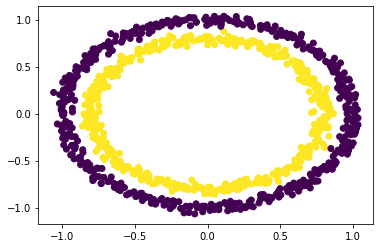

In [51]:
from sklearn.datasets import make_circles
n_sam=1000
x,y=make_circles(n_sam,noise=0.03,random_state=42)
len(x),len(y)
import pandas as pd
df=pd.DataFrame({"x1":x[:,0],"x2":x[:,1],"label":y})
df.head()
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],y=x[:,1],c=y)
import torch
import numpy 


In [52]:
import torch
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Model 0**

binary classification 

In [54]:
from torch import nn
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1=nn.Linear(in_features=2,out_features=5)
    self.l2=nn.Linear(in_features=5,out_features=1)

  def forward(self,x):
    return self.l2(self.l1(x))

mod_0=CircleModel()
mod_0

CircleModel(
  (l1): Linear(in_features=2, out_features=5, bias=True)
  (l2): Linear(in_features=5, out_features=1, bias=True)
)

In [55]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=mod_0.parameters(),lr=0.1)

In [56]:
mod_0.state_dict()

OrderedDict([('l1.weight', tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('l1.bias', tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('l2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('l2.bias', tensor([-0.2060]))])

In [57]:
def accuracy_fn(y_true,y_pred):
  cor=torch.eq(y_true,y_pred).sum().item()
  acc=(cor/len(y_pred)) * 100
  return acc

In [58]:
torch.manual_seed(42)
epochs=100
for epoch in range(epochs):
  mod_0.train()
  y_logits = mod_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  mod_0.eval()
  with torch.inference_mode():
    test_logits=mod_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
  
  if epoch % 10 == 0 :
    print(f"{epoch} , {loss:.5f} , {acc:.2f} , {test_loss:.5f} , {test_acc:.2f}") 

0 , 0.69569 , 50.00 , 0.69721 , 50.00
10 , 0.69403 , 50.00 , 0.69615 , 50.00
20 , 0.69343 , 46.00 , 0.69585 , 48.50
30 , 0.69321 , 49.00 , 0.69577 , 47.50
40 , 0.69312 , 49.50 , 0.69573 , 46.50
50 , 0.69308 , 50.38 , 0.69569 , 46.50
60 , 0.69306 , 50.50 , 0.69564 , 46.50
70 , 0.69305 , 50.50 , 0.69559 , 46.50
80 , 0.69304 , 50.75 , 0.69553 , 46.50
90 , 0.69303 , 50.38 , 0.69547 , 46.50


In [59]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


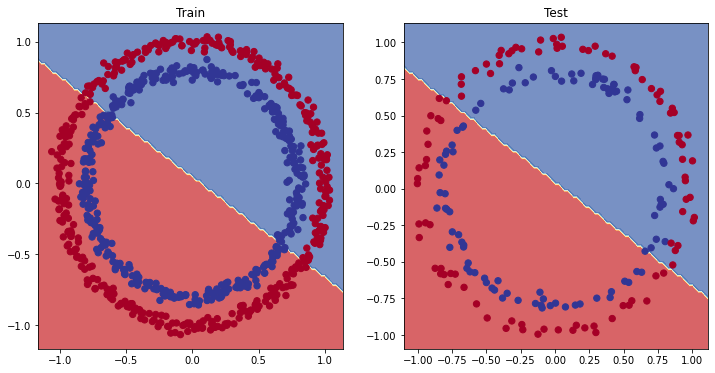

In [60]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(mod_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(mod_0, X_test, y_test)

**Model 1**

Binary classification

-adding extra layers

-adding extra neurons

In [61]:
class circlemodelv1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

mod_1=circlemodelv1()
mod_1


circlemodelv1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [62]:
mod_1.state_dict()

OrderedDict([('layer_1.weight', tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, 

In [63]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=mod_1.parameters(),lr=0.1)

In [64]:
torch.manual_seed(42)

In [65]:
epochs=1000
for epoch in range (epochs):
  mod_1.train()
  y_logits = mod_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  mod_1.eval()
  with torch.inference_mode():
    test_logits = mod_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch % 100 == 0:
     print(f"{epoch} , {loss:.5f} , {acc:.2f} , {test_loss:.5f} , {test_acc:.2f}") 



0 , 0.69396 , 50.88 , 0.69261 , 51.00
100 , 0.69305 , 50.38 , 0.69379 , 48.00
200 , 0.69299 , 51.12 , 0.69437 , 46.00
300 , 0.69298 , 51.62 , 0.69458 , 45.00
400 , 0.69298 , 51.12 , 0.69465 , 46.00
500 , 0.69298 , 51.00 , 0.69467 , 46.00
600 , 0.69298 , 51.00 , 0.69468 , 46.00
700 , 0.69298 , 51.00 , 0.69468 , 46.00
800 , 0.69298 , 51.00 , 0.69468 , 46.00
900 , 0.69298 , 51.00 , 0.69468 , 46.00


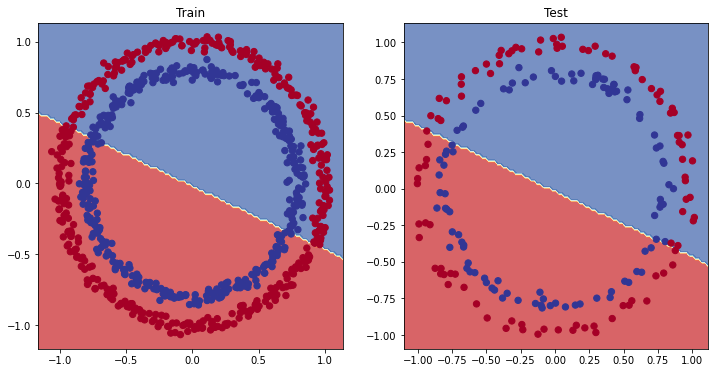

In [66]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(mod_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(mod_1, X_test, y_test)

In [67]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    def forward(self, x):
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

mod_3 = CircleModelV2()
print(mod_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [68]:
mod_3.state_dict()

OrderedDict([('layer_1.weight', tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, 

In [69]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(mod_3.parameters(),lr=0.1)

In [70]:
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):

    y_logits = mod_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    mod_3.eval()
    with torch.inference_mode():
      
      test_logits = mod_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) 
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss:{test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss:0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss:0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss:0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss:0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss:0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss:0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss:0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss:0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss:0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss:0.62145, Test Accuracy: 79.00%


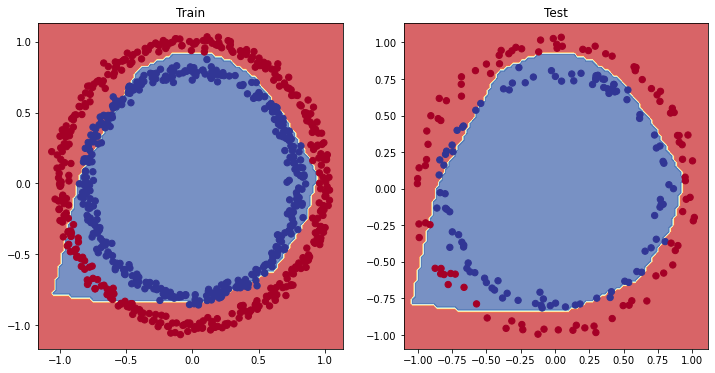

In [71]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(mod_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(mod_3, X_test, y_test)

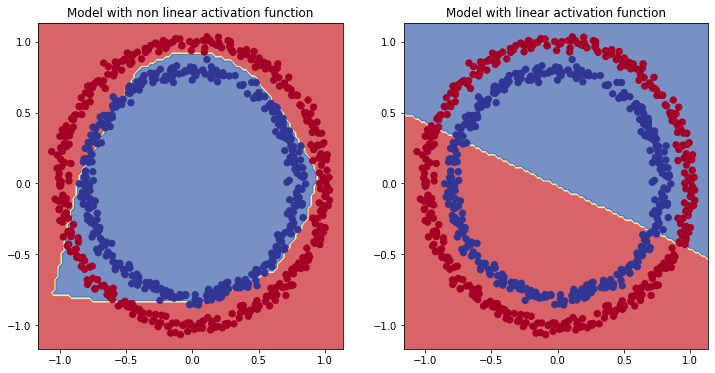

In [72]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Model with non linear activation function")
plot_decision_boundary(mod_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Model with linear activation function")
plot_decision_boundary(mod_1, X_train, y_train)

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


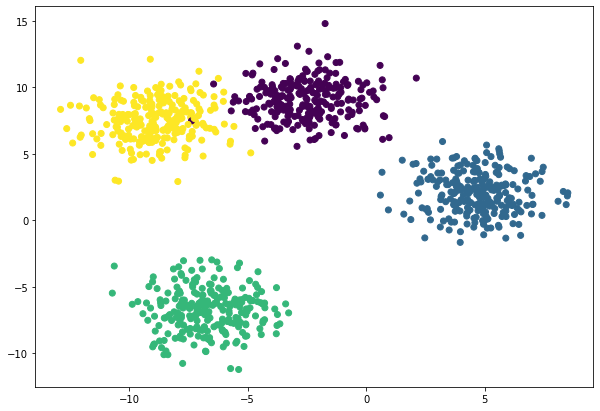

In [85]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES, 
    cluster_std=1.5, 
    random_state=RANDOM_SEED
)
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob);


In [97]:
class BlobModelv1(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
           )
  def forward(self,x):
       return self.linear_layer_stack(x)

mod_4=BlobModelv1(input_features=2,output_features=4,hidden_units=8)
mod_4



BlobModelv1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [98]:
loss_fn = nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=mod_4.parameters(),lr=0.1)

In [100]:
torch.manual_seed(42)

# Set number of epochs
epochs = 100

for epoch in range(epochs):
    mod_4.train()
    y_logits = mod_4(X_blob_train) 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    mod_4.eval()
    with torch.inference_mode():
      test_logits = mod_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 



Epoch: 0 | Loss: 1.15883, Acc: 40.38% | Test Loss: 1.07554, Test Acc: 48.00%
Epoch: 10 | Loss: 0.64476, Acc: 96.75% | Test Loss: 0.66069, Test Acc: 97.50%
Epoch: 20 | Loss: 0.42535, Acc: 98.50% | Test Loss: 0.43074, Test Acc: 100.00%
Epoch: 30 | Loss: 0.25294, Acc: 99.12% | Test Loss: 0.24508, Test Acc: 99.50%
Epoch: 40 | Loss: 0.11232, Acc: 99.25% | Test Loss: 0.10229, Test Acc: 99.50%
Epoch: 50 | Loss: 0.06627, Acc: 99.25% | Test Loss: 0.05848, Test Acc: 99.50%
Epoch: 60 | Loss: 0.05068, Acc: 99.25% | Test Loss: 0.04293, Test Acc: 99.50%
Epoch: 70 | Loss: 0.04300, Acc: 99.25% | Test Loss: 0.03491, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03836, Acc: 99.25% | Test Loss: 0.02988, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03525, Acc: 99.25% | Test Loss: 0.02663, Test Acc: 99.50%


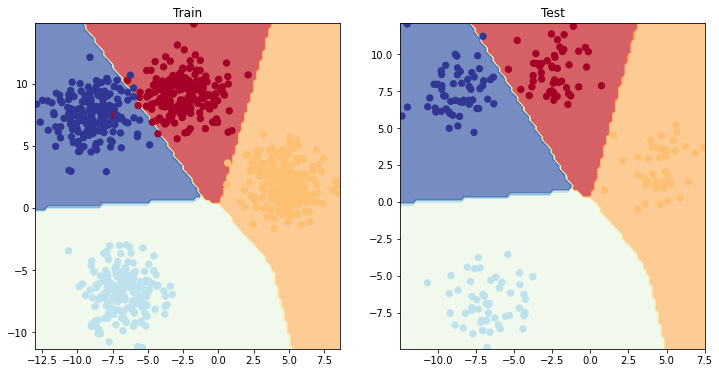

In [123]:
plt.figure(figsize=(12, 6))
plt.title("Model 4 with linear activaton function")
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(mod_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(mod_4, X_blob_test, y_blob_test)

In [115]:
class BlobModelv2(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        
        nn.Linear(in_features=hidden_units,out_features=output_features)
           )
  def forward(self,x):
       return self.linear_layer_stack(x)

mod_5=BlobModelv2(input_features=2,output_features=4,hidden_units=8)
mod_5


BlobModelv2(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [116]:
loss_fn = nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=mod_5.parameters(),lr=0.1)

In [117]:
torch.manual_seed(42)

# Set number of epochs
epochs = 100

for epoch in range(epochs):
    mod_5.train()
    y_logits = mod_5(X_blob_train) 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    mod_5.eval()
    with torch.inference_mode():
      test_logits = mod_5(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


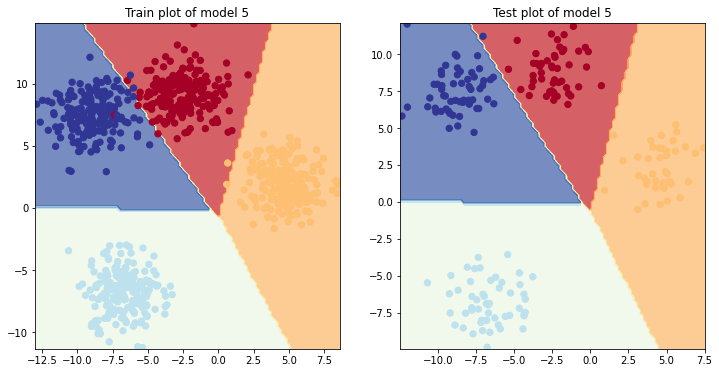

In [125]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train plot of model 5")
plot_decision_boundary(mod_5, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test plot of model 5")
plot_decision_boundary(mod_5, X_blob_test, y_blob_test)

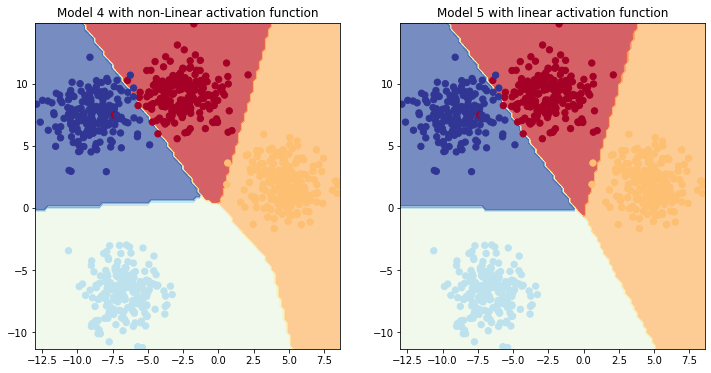

In [120]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Model 4 with non-Linear activation function")
plot_decision_boundary(mod_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Model 5 with linear activation function")
plot_decision_boundary(mod_5, X_blob_train, y_blob_train)